#Import dei dati

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import os
import urllib

matchesURL = "https://raw.githubusercontent.com/AlfonsoAnzelmo35/FootballPredictor/main/dataset/matches.csv"

os.makedirs("dataset", exist_ok=True)
file_path = os.path.join("dataset","matches.csv")
urllib.request.urlretrieve(matchesURL, file_path)
datasetPath = os.path.join("dataset","matches.csv")

matches = pd.read_csv(datasetPath, index_col=0)
matches.reset_index(drop=False, inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

matches.head(10)


,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team,weather
0,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,foggy
1,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,foggy
2,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,thunderstorm
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,cloudy
4,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,windy
5,2021-09-25,12:30,Premier League,Matchweek 6,Sat,Away,W,1.0,0.0,Chelsea,1.7,0.3,60.0,Rúben Dias,4-3-3,Michael Oliver,Match Report,15.0,3.0,16.5,0.0,0.0,0.0,2022,Manchester City,hail
6,2021-10-03,16:30,Premier League,Matchweek 7,Sun,Away,D,2.0,2.0,Liverpool,1.2,1.0,51.0,Rúben Dias,4-3-3,Paul Tierney,Match Report,12.0,3.0,16.8,1.0,0.0,0.0,2022,Manchester City,stormy
7,2021-10-16,15:00,Premier League,Matchweek 8,Sat,Home,W,2.0,0.0,Burnley,1.9,1.0,69.0,Kevin De Bruyne,4-3-3,Martin Atkinson,Match Report,16.0,6.0,14.6,0.0,0.0,0.0,2022,Manchester City,stormy
8,2021-10-23,17:30,Premier League,Matchweek 9,Sat,Away,W,4.0,1.0,Brighton,3.9,1.3,52.0,İlkay Gündoğan,4-3-3,Kevin Friend,Match Report,23.0,13.0,15.7,1.0,0.0,0.0,2022,Manchester City,foggy
9,2021-10-30,15:00,Premier League,Matchweek 10,Sat,Home,L,0.0,2.0,Crystal Palace,1.1,1.1,68.0,Rúben Dias,4-3-3,Andre Marriner,Match Report,14.0,3.0,17.0,0.0,0.0,0.0,2022,Manchester City,foggy


In [ ]:
print("righe, colonne ->", matches.shape)


righe, colonne -> (1389, 26)


In [ ]:
matches["team"].value_counts()

,count
team,
Southampton,72
Brighton and Hove Albion,72
Manchester United,72
West Ham United,72
Newcastle United,72
Burnley,71
Leeds United,71
Crystal Palace,71
Manchester City,71


In [ ]:
matches[matches["team"] == "Liverpool"]

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team,weather
705,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,3.3,0.6,50.0,NaN,Jordan Henderson,4-3-3,Michael Oliver,Match Report,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool,cloudy
706,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,2.6,1.0,61.0,NaN,Jordan Henderson,4-3-3,Paul Tierney,Match Report,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool,drizzle
707,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,3.2,1.2,67.0,NaN,Virgil van Dijk,4-3-3,Craig Pawson,Match Report,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool,sunny
708,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,1.8,3.9,69.0,NaN,Virgil van Dijk,4-3-3,Martin Atkinson,Match Report,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool,cloudy
709,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,2.2,1.3,57.0,NaN,Jordan Henderson,4-3-3,Michael Oliver,Match Report,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool,foggy
710,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,2.5,1.5,61.0,NaN,Jordan Henderson,4-2-3-1,Mike Dean,Match Report,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool,thunderstorm
711,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,1.8,0.5,73.0,NaN,Jordan Henderson,4-3-3,Kevin Friend,Match Report,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool,hail
712,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,1.4,1.6,46.0,NaN,Jordan Henderson,4-2-3-1,Craig Pawson,Match Report,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool,hail
713,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,3.7,1.3,56.0,NaN,James Milner,4-3-3,Chris Kavanagh,Match Report,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool,foggy
714,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,0.5,2.1,60.0,NaN,James Milner,4-3-3,Stuart Attwell,Match Report,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool,hail


In [ ]:
## match per settimana
matches["round"].value_counts()

,count
round,
Matchweek 1,39
Matchweek 16,39
Matchweek 34,39
Matchweek 32,39
Matchweek 31,39
Matchweek 29,39
Matchweek 28,39
Matchweek 26,39
Matchweek 25,39


#Cleaning

rimozione della colonna comp -> campionato

In [ ]:
matches.drop('comp', axis = 1, inplace = True)
matches.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team,weather,target
0,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,foggy,0
1,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,foggy,1
2,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,thunderstorm,1
3,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,cloudy,1
4,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,windy,0


Verifica del numero di righe con valori NaN

In [ ]:
print("Numero di righe con valori NaN prima della rimozione:", matches.isnull().any(axis=1).sum())

# Rimuovi le righe con valori NaN
matches = matches.dropna()

print("Numero di righe con valori NaN dopo la rimozione:", matches.isnull().any(axis=1).sum())

Numero di righe con valori NaN prima della rimozione: 0
Numero di righe con valori NaN dopo la rimozione: 0


Verifica del numero di duplicati

In [ ]:
print("Numero di righe duplicate prima della rimozione:", matches.duplicated().sum())

Numero di righe duplicate prima della rimozione: 0


In [ ]:
#i modelli di Machine learning non lavorano con gl'oggetti, invece lavorano con tipi numerici
matches.dtypes

,0
date,object
time,object
round,object
day,object
venue,object
result,object
gf,float64
ga,float64
opponent,object
xg,float64


Ci permette di ottenere informazioni più specifiche sulla data


In [ ]:
pd.to_datetime(matches['date'])

,date
0,2021-08-15
1,2021-08-21
2,2021-08-28
3,2021-09-11
4,2021-09-18
5,2021-09-25
6,2021-10-03
7,2021-10-16
8,2021-10-23
9,2021-10-30


In [ ]:
#aggiunge la colonna target se l'iesima riga ha il valore result = "W" allora il valore è True, poi convertito in 1
#altrimenti False e poi convertito in 0

matches["target"] = (matches["result"] == "W").astype("int")
matches.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team,weather,target
0,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,foggy,0
1,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,foggy,1
2,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,thunderstorm,1
3,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,cloudy,1
4,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,windy,0


#DATA PREPARATION

Feature selection

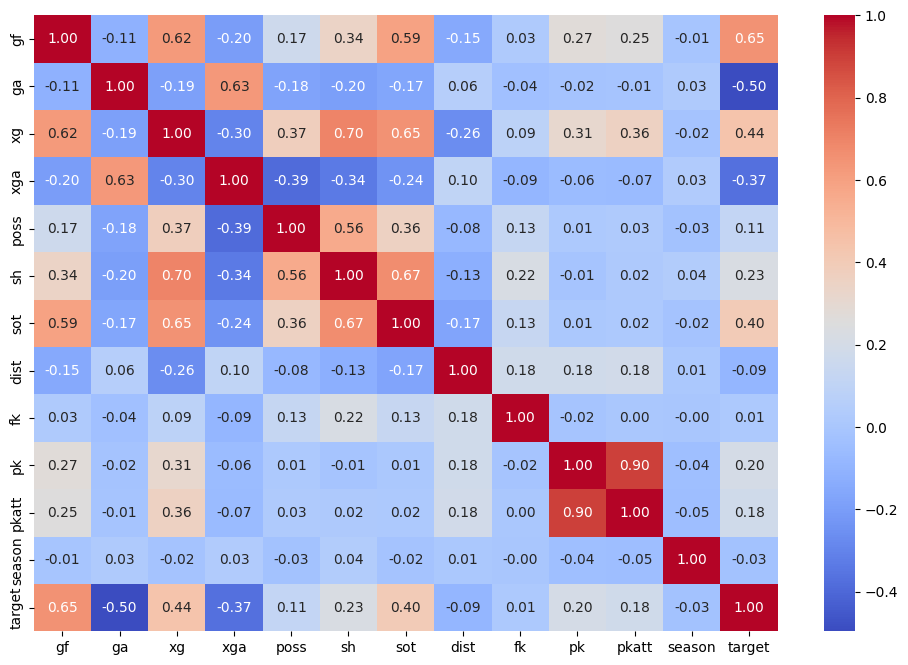

Le feature selezionate sono:
Index(['date', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss',
       'captain', 'formation', 'sh', 'sot', 'pk', 'pkatt', 'team', 'target'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns


# Carica il dataset (sostituisci 'your_dataset.csv' con il percorso effettivo del file)
data = matches.copy()

# STEP 1: Rimuovere variabili a bassa varianza
# Impostiamo una soglia di varianza. Le colonne con varianza inferiore saranno rimosse.
selector = VarianceThreshold(threshold=0.1)
# Manteniamo solo le variabili numeriche per calcolare la varianza
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['time'], errors='ignore')
selector.fit(numeric_data)
low_variance_features = numeric_data.columns[~selector.get_support()]
# Eliminiamo le variabili a bassa varianza dal dataset
data = data.drop(columns=low_variance_features)

# STEP 2: Calcolare la correlazione per le variabili numeriche
# Calcola la matrice di correlazione, excluding non-numeric columns
# Exclude the 'time' column from correlation calculation
corr_matrix = data.select_dtypes(include=[np.number]).drop(columns=['time'], errors='ignore').corr()
# Visualizza la matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Identifica le variabili con bassa correlazione con la variabile target 'result'
# Seleziona una soglia di correlazione (ad esempio 0.1)
# Assuming 'result' is numeric, otherwise adjust this part
low_correlation_features = [col for col in corr_matrix.columns if abs(corr_matrix['target'][col]) < 0.1]
# Rimuovi le variabili a bassa correlazione
data = data.drop(columns=low_correlation_features)

# STEP 3: Test Chi-quadro per variabili categoriali rispetto a 'result'
# Selezioniamo le variabili categoriali per il test Chi-quadro
categorical_data = data.select_dtypes(include=['object']).copy()

# Esegui il test Chi-quadro su ciascuna variabile categoriale rispetto a 'result'
# Assuming 'target' represents the outcome, change to 'result' if needed
for col in categorical_data.columns:
    contingency_table = pd.crosstab(data['target'], data[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p > 0.05 and str(col) not in "date":  # Se il valore p è alto, la variabile non è significativamente correlata a 'result'
        data = data.drop(columns=[col])

# Output finale delle colonne selezionate
print("Le feature selezionate sono:")
print(data.columns)

#Addestramento del nostro algoritmo

controlliamo se il dataset è sbilanciato

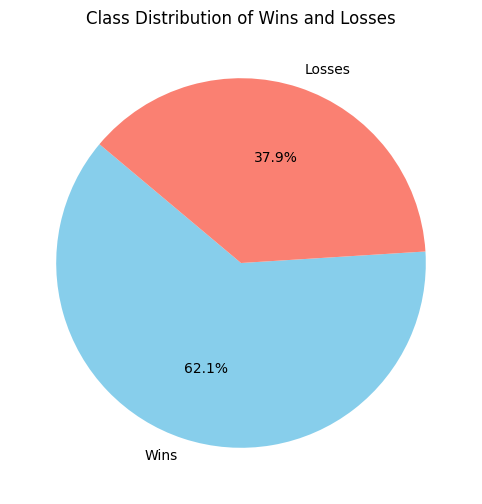

In [ ]:
import matplotlib.pyplot as plt

class_counts = data['target'].value_counts()
labels = ['Wins', 'Losses']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Class Distribution of Wins and Losses')
plt.show()

In [ ]:
data.columns

Index(['date', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss',
       'captain', 'formation', 'sh', 'sot', 'pk', 'pkatt', 'team', 'target'],
      dtype='object')

In [ ]:
#aggiunge la colonna venue_code ed inserisce valori della colonna venue in modo categorico
#(quando si gioca in casa o fuori casa)
data["result_code"] = data["result"].astype("category").cat.codes

#aggiunge la colonna opp_code ed inserisce valori della colonna venue in modo categorico
data["opp_code"] = data["opponent"].astype("category").cat.codes

#aggiunge la colonna opp_code ed inserisce valori della colonna venue in modo categorico
data["cap_code"] = data["captain"].astype("category").cat.codes

#aggiunge la colonna opp_code ed inserisce valori della colonna venue in modo categorico
data["team_code"] = data["team"].astype("category").cat.codes

#aggiunge la colonna opp_code ed inserisce valori della colonna venue in modo categorico
data["formation_code"] = data["formation"].astype("category").cat.codes

data.head()

,date,result,gf,ga,opponent,xg,xga,poss,captain,formation,sh,sot,pk,pkatt,team,target,result_code,opp_code,cap_code,team_code,formation_code
0,2021-08-15,L,0.0,1.0,Tottenham,1.9,1.3,64.0,Fernandinho,4-3-3,18.0,4.0,0.0,0.0,Manchester City,0,1,18,24,12,10
1,2021-08-21,W,5.0,0.0,Norwich City,2.7,0.1,67.0,İlkay Gündoğan,4-3-3,16.0,4.0,0.0,0.0,Manchester City,1,2,15,90,12,10
2,2021-08-28,W,5.0,0.0,Arsenal,3.8,0.1,80.0,İlkay Gündoğan,4-3-3,25.0,10.0,0.0,0.0,Manchester City,1,2,0,90,12,10
3,2021-09-11,W,1.0,0.0,Leicester City,2.9,0.8,61.0,İlkay Gündoğan,4-3-3,25.0,8.0,0.0,0.0,Manchester City,1,2,10,90,12,10
4,2021-09-18,D,0.0,0.0,Southampton,1.1,0.4,63.0,Fernandinho,4-3-3,16.0,1.0,0.0,0.0,Manchester City,0,0,17,24,12,10


divisione tra train set e test set, facendo attenzione al fatto che i nostri dati sono affetti dal tempo.Ci assicuriamo che i dati nel test set vengano dopo quelli presenti nel train set

In [ ]:
#divido il dataset, ma vogliamo essere sicuri di predire con dati del passato dati del futuro
train = data[data["date"] < '2022-01-01']
test = data[data["date"] > '2022-01-01']

print(train.shape)
print(test.shape)

(1106, 21)
(276, 21)


In [ ]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

lista di predittori

In [ ]:
#vogliamo come predittori le colonne di data, ricordando che è necessario che siano numeri
predictors = ["opp_code", "xg", "poss", "formation_code", "cap_code", "team_code" , "sh", "sot", "pkatt", "team_code" ]
predictors

['opp_code',
 'xg',
 'poss',
 'formation_code',
 'cap_code',
 'team_code',
 'sh',
 'sot',
 'pkatt',
 'team_code']

In [ ]:
rf.fit(train[predictors], train["target"])

preds = rf.predict(test[predictors])

print(preds)

[0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0]


Misurazione della accuratezza

In [ ]:
acc = accuracy_score(test["target"], preds)
acc

0.7391304347826086

\Combiniamo le nostre predizioni con i valori veri in un nuovo dataframe

In [ ]:
combined = pd.DataFrame(dict(actual = test["target"], prediction = preds))

notiamo che la maggior parte delle volte che abbiamo predetto una sconfitta o un pareggio il modello ha correttamente predetto. Ma quando sbaglia di molto quando deve predire le vittoria.

In [ ]:
pd.crosstab(index = combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,147,25
1,47,57


In [ ]:
precision_score(test["target"],preds)

0.6951219512195121

#Aumentiamo la precisione

raggruppiamo per team

In [ ]:
grouped_matches = data.groupby("team")

group = grouped_matches.get_group("Manchester City")
group

,date,result,gf,ga,opponent,xg,xga,poss,captain,formation,sh,sot,pk,pkatt,team,target,result_code,opp_code,cap_code,team_code,formation_code
0,2021-08-15,L,0.0,1.0,Tottenham,1.9,1.3,64.0,Fernandinho,4-3-3,18.0,4.0,0.0,0.0,Manchester City,0,1,18,24,12,10
1,2021-08-21,W,5.0,0.0,Norwich City,2.7,0.1,67.0,İlkay Gündoğan,4-3-3,16.0,4.0,0.0,0.0,Manchester City,1,2,15,90,12,10
2,2021-08-28,W,5.0,0.0,Arsenal,3.8,0.1,80.0,İlkay Gündoğan,4-3-3,25.0,10.0,0.0,0.0,Manchester City,1,2,0,90,12,10
3,2021-09-11,W,1.0,0.0,Leicester City,2.9,0.8,61.0,İlkay Gündoğan,4-3-3,25.0,8.0,0.0,0.0,Manchester City,1,2,10,90,12,10
4,2021-09-18,D,0.0,0.0,Southampton,1.1,0.4,63.0,Fernandinho,4-3-3,16.0,1.0,0.0,0.0,Manchester City,0,0,17,24,12,10
5,2021-09-25,W,1.0,0.0,Chelsea,1.7,0.3,60.0,Rúben Dias,4-3-3,15.0,3.0,0.0,0.0,Manchester City,1,2,5,75,12,10
6,2021-10-03,D,2.0,2.0,Liverpool,1.2,1.0,51.0,Rúben Dias,4-3-3,12.0,3.0,0.0,0.0,Manchester City,0,0,11,75,12,10
7,2021-10-16,W,2.0,0.0,Burnley,1.9,1.0,69.0,Kevin De Bruyne,4-3-3,16.0,6.0,0.0,0.0,Manchester City,1,2,4,50,12,10
8,2021-10-23,W,4.0,1.0,Brighton,3.9,1.3,52.0,İlkay Gündoğan,4-3-3,23.0,13.0,0.0,0.0,Manchester City,1,2,3,90,12,10
9,2021-10-30,L,0.0,2.0,Crystal Palace,1.1,1.1,68.0,Rúben Dias,4-3-3,14.0,3.0,0.0,0.0,Manchester City,0,1,6,75,12,10


definiamo una funzione che prende un dataframe, una lista contente i nomi delle colonne sulle quali fare rolling e una lista contente i nuovi nomi delle colonne.  

In [ ]:
def lastThreeMatchesPerform(group, cols, new_cols):
  #di una finestra di 3, calcola la media delle colonne passate sulle 3 righe precedenti escludendo però la corrente
  group.sort_values("date")
  new_stats = group[cols].rolling(3, closed = 'left').mean()
  group[new_cols] = new_stats

  #elimina le righe che hanno valori NaN
  group = group.dropna(subset = new_cols)
  return group

#il gruppo Mancher city ha informazione sulle ultime 3 partite precenti
#lastThreeMatchesPerform(group, ["gf","ga","sh","sot","dist","fk","pk","pkatt"],
#                        ["gf_rolling","ga_rolling","sh_rolling","sot_rolling","dist_rolling","fk_rolling","pk_rolling","pkatt_rolling"])

#per ogni team ho informazioni sulle ultime 3 partite precenti
grouped_matchesLast3Perfomed = grouped_matches.apply(lambda x: lastThreeMatchesPerform(x, ["gf","ga","sh","sot","pk","pkatt"],
                        ["gf_last3Performed","ga_last3Performed","sh_last3Performed","sot_last3Performed","pk_last3Performed","pkatt_last3Performed"]))

<ipython-input-47-b741cfcf426f>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_matchesLast3Perfomed = grouped_matches.apply(lambda x: lastThreeMatchesPerform(x, ["gf","ga","sh","sot","pk","pkatt"],


sistemiamo gli indici

In [ ]:
#vogliamo eliminare l'indice multilivello
grouped_matchesLast3Perfomed = grouped_matchesLast3Perfomed.droplevel("team")

#resettiamo l'indice così da essere unico per ogni riga
#grouped_matchesLast3Perfomed.shape restituisce una tupla con due valori #numero righe e numero colonne
grouped_matchesLast3Perfomed.index = range(grouped_matchesLast3Perfomed.shape[0])
grouped_matchesLast3Perfomed

,date,result,gf,ga,opponent,xg,xga,poss,captain,formation,sh,sot,pk,pkatt,team,target,result_code,opp_code,cap_code,team_code,formation_code,gf_last3Performed,ga_last3Performed,sh_last3Performed,sot_last3Performed,pk_last3Performed,pkatt_last3Performed
0,2021-09-11,W,1.0,0.0,Norwich City,2.8,0.6,52.0,Pierre-Emerick Aubameyang,4-2-3-1,30.0,6.0,0.0,0.0,Arsenal,1,2,15,70,0,7,0.000000,3.000000,9.666667,2.333333,0.000000,0.000000
1,2021-09-18,W,1.0,0.0,Burnley,1.2,1.3,54.0,Pierre-Emerick Aubameyang,4-1-4-1,13.0,3.0,0.0,0.0,Arsenal,1,2,4,70,0,5,0.333333,2.333333,12.333333,3.000000,0.000000,0.000000
2,2021-09-26,W,3.0,1.0,Tottenham,0.8,1.0,46.0,Pierre-Emerick Aubameyang,4-2-3-1,12.0,7.0,0.0,0.0,Arsenal,1,2,18,70,0,7,0.666667,1.666667,14.666667,3.000000,0.000000,0.000000
3,2021-10-02,D,0.0,0.0,Brighton,0.5,1.4,41.0,Pierre-Emerick Aubameyang,4-2-3-1,8.0,2.0,0.0,0.0,Arsenal,0,0,3,70,0,7,1.666667,0.333333,18.333333,5.333333,0.000000,0.000000
4,2021-10-18,D,2.0,2.0,Crystal Palace,1.4,0.9,55.0,Pierre-Emerick Aubameyang,4-1-4-1,17.0,6.0,0.0,0.0,Arsenal,0,0,6,70,0,5,1.333333,0.333333,11.000000,4.000000,0.000000,0.000000
5,2021-10-22,W,3.0,1.0,Aston Villa,2.7,1.4,54.0,Pierre-Emerick Aubameyang,4-2-3-1,21.0,8.0,0.0,1.0,Arsenal,1,2,1,70,0,7,1.666667,1.000000,12.333333,5.000000,0.000000,0.000000
6,2021-10-30,W,2.0,0.0,Leicester City,0.9,1.2,36.0,Pierre-Emerick Aubameyang,4-4-1-1,9.0,5.0,0.0,0.0,Arsenal,1,2,10,70,0,12,1.666667,1.000000,15.333333,5.333333,0.000000,0.333333
7,2021-11-07,W,1.0,0.0,Watford,1.7,0.7,60.0,Pierre-Emerick Aubameyang,4-4-1-1,13.0,5.0,0.0,1.0,Arsenal,1,2,19,70,0,12,2.333333,1.000000,15.666667,6.333333,0.000000,0.333333
8,2021-11-20,L,0.0,4.0,Liverpool,0.4,4.3,37.0,Pierre-Emerick Aubameyang,4-4-1-1,5.0,3.0,0.0,0.0,Arsenal,0,1,11,70,0,12,2.000000,0.333333,14.333333,6.000000,0.000000,0.666667
9,2021-11-27,W,2.0,0.0,Newcastle Utd,2.0,0.2,65.0,Pierre-Emerick Aubameyang,4-4-1-1,24.0,6.0,0.0,0.0,Arsenal,1,2,14,70,0,12,1.000000,1.333333,9.000000,4.333333,0.000000,0.333333


riaddestriamo il modello e misuriamo la precisione

In [ ]:
train = grouped_matchesLast3Perfomed[grouped_matchesLast3Perfomed["date"] < '2022-01-01']

test = grouped_matchesLast3Perfomed[grouped_matchesLast3Perfomed["date"] > '2022-01-01']

predictors += ["gf_last3Performed","ga_last3Performed","sh_last3Performed","sot_last3Performed","pk_last3Performed","pkatt_last3Performed"]

rf.fit(train[predictors], train["target"])

preds = rf.predict(test[predictors])

print(precision_score(test["target"],preds))
print(accuracy_score(test["target"],preds))

combined = pd.DataFrame(dict(actual = test["target"], prediction = preds), index = test.index)
combined


0.6707317073170732
0.7246376811594203


,actual,prediction
17,0,0
18,1,1
19,1,0
20,1,1
21,1,1
22,1,1
23,0,0
24,1,0
25,0,0
26,0,1


vogliamo anche sapere i valori di combined a quali squadre si riferiscono, eseguiamo il merge.

In [ ]:
merged_combined = combined.merge(grouped_matchesLast3Perfomed[["date","opponent","team","result"]], left_index = True, right_index = True)
merged_combined

,actual,prediction,date,opponent,team,result
17,0,0,2022-01-23,Burnley,Arsenal,D
18,1,1,2022-02-10,Wolves,Arsenal,W
19,1,0,2022-02-19,Brentford,Arsenal,W
20,1,1,2022-02-24,Wolves,Arsenal,W
21,1,1,2022-03-06,Watford,Arsenal,W
22,1,1,2022-03-13,Leicester City,Arsenal,W
23,0,0,2022-03-16,Liverpool,Arsenal,L
24,1,0,2022-03-19,Aston Villa,Arsenal,W
25,0,0,2022-04-04,Crystal Palace,Arsenal,L
26,0,1,2022-04-09,Brighton,Arsenal,L


DecisionTreeClassifier

In [ ]:
decisionTreeClassifier = DecisionTreeClassifier()

decisionTreeClassifier.fit(train[predictors], train["target"])

preds = decisionTreeClassifier.predict(test[predictors])

print("accuratezza -> ", accuracy_score(test["target"],preds))
print("precisione -> ",precision_score(test["target"],preds))

accuratezza ->  0.6485507246376812
precisione ->  0.5299145299145299


In [ ]:
gnb = GaussianNB()

gnb.fit(train[predictors], train["target"])

preds = gnb.predict(test[predictors])

print("accuratezza -> ", accuracy_score(test["target"],preds))
print("precisione -> ",precision_score(test["target"],preds))

accuratezza ->  0.677536231884058
precisione ->  0.5949367088607594


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

rf_model.fit(train[predictors], train["target"])

# Make predictions on the test set
preds = rf_model.predict(test[predictors])


print("accuratezza -> ", accuracy_score(test["target"],preds))
print("precisione -> ",precision_score(test["target"],preds))


accuratezza ->  0.7101449275362319
precisione ->  0.6463414634146342
